In [1]:
'''


Economic Forecasts with the Yield Curve

Every U.S. recession in the past 60 years was preceded by a negative term spread (an inverted yield curve).
(Rudebusch and Williams 2009). This project hopes to visually display the striking accuracy of the
2-year and 10-year term spread (the main one that traders watch), as well as the 3-month/10-year and
5-year/30-year spreads. 



'''

'\n\n\nEconomic Forecasts with the Yield Curve\n\nEvery U.S. recession in the past 60 years was preceded by a negative term spread (an inverted yield curve).\n(Rudebusch and Williams 2009). This project hopes to visually display the striking accuracy of the\n2-year and 10-year term spread (the main one that traders watch), as well as the 3-month/10-year and\n5-year/30-year spreads. \n\n\n\n'

In [53]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Treasury rates 
# https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=all

#Load Spy Historical data
#https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

In [46]:
rates = pd.read_csv('daily-treasury-rates.csv')
#rates.head(5)
spy = pd.read_csv('HistoricalPrices.csv')
spy.head(-5)

,Date,Open,High,Low,Close
0,04/01/22,4540.32,4548.70,4507.57,4545.86
1,03/31/22,4599.02,4603.07,4530.41,4530.41
2,03/30/22,4624.20,4627.77,4581.32,4602.45
3,03/29/22,4602.86,4637.30,4589.66,4631.60
4,03/28/22,4541.09,4575.65,4517.69,4575.52
...,...,...,...,...,...
8116,01/16/90,340.75,340.75,333.37,340.75
8117,01/15/90,337.00,339.94,336.57,337.00
8118,01/12/90,339.93,348.53,339.49,339.93
8119,01/11/90,348.53,350.14,347.31,348.53


In [66]:
rates['Date'] = pd.to_datetime(rates['Date'],format = '%m/%d/%y')
spy['Date'] = pd.to_datetime(spy['Date'])

In [22]:
# Calculating the yield spread 
# three_month = 10 Yr - 3 Mo
# two_year = 10 Yr - 2 Yr
# five_year = 30 Yr - 5 Yr

In [74]:
rates = rates.assign(three_month = rates['10 Yr'] - rates['3 Mo'], 
                     two_year = rates['10 Yr'] - rates['2 Yr'], 
                     five_year = rates['30 Yr'] - rates['5 Yr'])

In [75]:
rates.head(5)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,three_month,two_year,five_year
0,2022-03-31,0.17,0.35,0.52,1.06,1.63,2.28,2.45,2.42,2.40,2.32,2.59,2.44,1.80,0.04,0.02
1,2022-03-30,0.16,0.33,0.55,1.04,1.64,2.31,2.49,2.44,2.43,2.35,2.63,2.48,1.80,0.04,0.04
2,2022-03-29,0.18,0.34,0.55,1.06,1.67,2.35,2.54,2.49,2.50,2.41,2.68,2.53,1.86,0.06,0.04
3,2022-03-28,0.19,0.36,0.59,1.08,1.69,2.35,2.55,2.54,2.55,2.46,2.72,2.57,1.87,0.11,0.03
4,2022-03-25,0.17,0.32,0.55,1.01,1.67,2.30,2.51,2.55,2.56,2.48,2.74,2.60,1.93,0.18,0.05


In [40]:
# Joining data for rates and SP500 close price together

,Date,Open,High,Low,Close
0,04/01/22,4540.32,4548.70,4507.57,4545.86
1,03/31/22,4599.02,4603.07,4530.41,4530.41
2,03/30/22,4624.20,4627.77,4581.32,4602.45
3,03/29/22,4602.86,4637.30,4589.66,4631.60
4,03/28/22,4541.09,4575.65,4517.69,4575.52


In [108]:
together = pd.merge(rates, spy, how ='left', on = 'Date') 
together1 = together.interpolate(method = 'linear')

In [ ]:
# Checking for null values

In [109]:
together.isnull().sum()

Date              0
1 Mo           2900
2 Mo           7205
3 Mo              4
6 Mo              1
1 Yr              1
2 Yr              1
3 Yr              1
5 Yr              1
7 Yr              1
10 Yr             1
20 Yr           940
30 Yr           995
three_month       4
two_year          1
five_year       995
 Open            12
 High            12
 Low             12
 Close           12
dtype: int64

In [ ]:
# Since this project isn't focused on 1 Mo and 2 Mo rates, I will be ignoring those null values
# Therefore, I decided to first create a new variable that contains the values I am interested in
# I tried to clean the data in 'together' dataframe first, but realized I lose a lot of values
# due to all the NaNs in 1 Mo and 2 Mo rates

In [163]:
spread = together[['Date', 'three_month', 'two_year', ' Close']]
#five_yr_spread = together[['Date', 'five_year']]

In [ ]:
# Now, I replace the missing values
# Since this data is gathered daily, and the bigger picture timeframe is larger
# I decided it is probably okay to remove the NA values 

In [125]:
spread = spread.dropna(axis = 0, how = 'any')

In [113]:
spread.tail(5)

,Date,three_month,two_year,five_year,Close
8064,1990-01-09,0.22,0.11,0.18,349.62
8065,1990-01-08,0.23,0.12,0.17,353.79
8066,1990-01-05,0.20,0.09,0.14,352.20
8067,1990-01-04,0.14,0.06,0.13,355.67
8068,1990-01-03,0.10,0.05,0.12,358.76


In [ ]:
# Checking to see if null values are removed

In [126]:
spread.isnull().sum()

Date           0
three_month    0
two_year       0
 Close         0
dtype: int64

/var/folders/sj/x46s482s0zs_2rd0g1_25m5r0000gn/T/ipykernel_6605/176462421.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



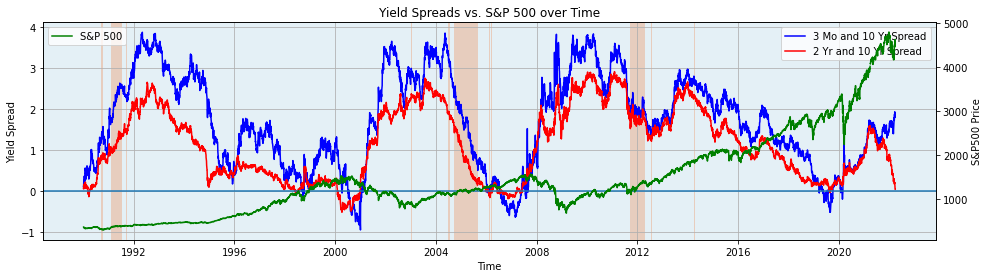

In [180]:
fig, ax = plt.subplots(figsize=(16, 4))

plt.plot(spread['Date'],
        spread['three_month'], color = 'b', label = '3 Mo and 10 Yr Spread')
plt.plot(spread['Date'],
        spread['two_year'], color = 'r', label = '2 Yr and 10 Yr Spread')

plt.grid()
plt.axhline(0)
plt.legend()

# Getting Second Axis
ax2 = ax.twinx()
plt.plot(spread['Date'],
        spread[' Close'],
        color = 
         'g', label = 'S&P 500')
plt.legend()

# labels
ax.set_xlabel('Time')
ax.set_ylabel('Yield Spread')
ax2.set_ylabel('S&P500 Price')
plt.title('Yield Spreads vs. S&P 500 over Time')


# Highlighting background color where spread inverts

spread['three_month_simple'] = [-100 if val > 0 else 100 for val in spread['three_month'].values]
ax.pcolorfast(ax.get_xlim(), ax.get_ylim(),
             spread['three_month_simple'].values[np.newaxis],
             cmap = 'Paired', alpha=0.3)



In [ ]:
# Highlighting when spread inverts (< 0)

TypeError: cannot unpack non-iterable function object

,Date,three_month,two_year,five_year,Close
860,2018-10-22,0.86,0.28,0.33,2755.88
861,2018-10-19,0.89,0.28,0.33,2767.78
862,2018-10-18,0.85,0.30,0.33,2768.78
863,2018-10-17,0.88,0.30,0.31,2809.21
864,2018-10-16,0.86,0.29,0.30,2809.92


Date           0
three_month    0
two_year       0
five_year      0
 Close         0
dtype: int64

Date             0
three_month      4
two_year         1
five_year      995
 Close          12
dtype: int64

Date              0
1 Mo           2900
2 Mo           7205
3 Mo              4
6 Mo              1
1 Yr              1
2 Yr              1
3 Yr              1
5 Yr              1
7 Yr              1
10 Yr             1
20 Yr           940
30 Yr           995
three_month       4
two_year          1
five_year       995
 Open            12
 High            12
 Low             12
 Close           12
dtype: int64